In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cancer_ih = pd.read_excel('../HK_reactions_analysis/HK_tissue_Countdata.xlsx', sheet_name='Cancer_ih')
cancer_r2 = pd.read_excel('../HK_reactions_analysis/HK_tissue_Countdata.xlsx', sheet_name='Cancer_r2')
cancer_r3d = pd.read_excel('../HK_reactions_analysis/HK_tissue_Countdata.xlsx', sheet_name='Cancer_r3d')

tissue_ih = pd.read_excel('../HK_reactions_analysis/HK_tissue_Countdata.xlsx', sheet_name='Tissue_ih')
tissue_r2 = pd.read_excel('../HK_reactions_analysis/HK_tissue_Countdata.xlsx', sheet_name='Tissue_r2')
tissue_r3d = pd.read_excel('../HK_reactions_analysis/HK_tissue_Countdata.xlsx', sheet_name='Tissue_r3d')

In [3]:
cancer_ih.head()

,HKcount,SS,rxns
0,44,Glycolysis / Gluconeogenesis,MAR03905
1,36,Glycolysis / Gluconeogenesis,MAR03907
2,27,Glycolysis / Gluconeogenesis,MAR04097
3,27,Glycolysis / Gluconeogenesis,MAR04108
4,27,Glycolysis / Gluconeogenesis,MAR04133


In [ ]:
# def plot_count_data(df, gem, data):
#     uSS = df['SS'].unique()
#     _,ax = plt.subplots(1,1,figsize=(15,50))
#     k=0
#     yticks = []
#     for i in uSS:
#         df_ss = df[df['SS']==i]
#         ax.barh(list(range(k,k+len(df_ss))),np.sort(df_ss['HKcount']),label=i,height=0.9,linewidth=0)
#         ax.plot([0,-0.5,-0.5,0],[k-3,k-3,k+len(df_ss)+3,k+len(df_ss)+3],'k',linewidth=1)
#         yticks.append((2*k+len(df_ss))//2)
#         k+=len(df_ss)+10
#     ax.spines['top'].set_visible(False)
#     ax.spines['right'].set_visible(False)
#     ax.spines['bottom'].set_visible(False)
#     ax.spines['left'].set_visible(False)
#     ax.set_xlim(-0.6,df['HKcount'].max()+1)
#     ax.set_ylim(bottom=-5, top=None) 
#     ax.set_yticks(yticks)
#     ax.set_yticklabels(uSS,fontweight='bold')
#     ax.set_xticklabels(ax.get_xticklabels(),fontweight='bold')
#     ax.set_xlabel(f'Number of {data}',fontweight='bold', fontsize=25)
#     ax.set_ylabel(f'Subsystems of housekeeping reactions present in the GEM, {gem}',fontweight='bold',fontsize=25)
#     plt.savefig(f'./HK_SS_count_{gem}_{data}.png',bbox_inches='tight')

In [108]:
def plot_count_data(df_t, df_c, gem=None):
    uSS = df_t['SS'].unique()
    _,ax = plt.subplots(1,3,figsize=(45
                                     ,60), gridspec_kw={
                           'width_ratios': [2.5,1.2,2.5]})
    k=0
    yticks = []
    ax[2].sharey(ax[0])
    spaces = {'Human1':20,'Recon2.2':10,'Recon3D':15}
    space = spaces[gem]
    for i in uSS:
        df_ss_t = df_t[df_t['SS']==i]
        ax[2].barh(list(range(k,k+len(df_ss_t))),np.sort(df_ss_t['HKcount']),label=i,height=0.9,linewidth=0)
        ax[2].plot([0,-0.5,-0.5,0],[k-3,k-3,k+len(df_ss_t)+3,k+len(df_ss_t)+3],'k',linewidth=2)
        ax[2].plot([-0.5,-1],[k+len(df_ss_t)/2]*2,'k',linewidth=2)

        df_ss_c = df_c[df_c['SS']==i]
        ax[0].barh(list(range(k,k+len(df_ss_c))),-1*np.sort(df_ss_c['HKcount']),label=i,height=0.9,linewidth=0)
        ax[0].plot([0,0.5,0.5,0],[k-3,k-3,k+len(df_ss_c)+3,k+len(df_ss_c)+3],'k',linewidth=2)
        ax[0].plot([0.5,1],[k+len(df_ss_t)/2]*2,'k',linewidth=2)

        yticks.append((2*k+len(df_ss_t))//2)
        k+=len(df_ss_t)+space
    for a in ax:
        a.spines['top'].set_visible(False)
        a.spines['right'].set_visible(False)
        a.spines['bottom'].set_visible(False)
        a.spines['left'].set_visible(False)
    ax[2].set_xlim(-1,df_t['HKcount'].max()+1)
    ax[0].set_xlim(left=-1*df_t['HKcount'].max()+1, right=1)
    ax[2].set_ylim(bottom=-5, top=k)
    ax[0].set_ylim(bottom=-5, top=k)
    ax[2].set_xticklabels(ax[2].get_xticklabels(),fontweight='bold', fontsize=25)
    ax[0].set_xticklabels([int(-1*f) for f in ax[0].get_xticks()],fontweight='bold', fontsize=25)
    ax[2].set_xlabel(f'Number of HPA tissues',fontweight='bold', fontsize=30)
    ax[0].set_xlabel(f'Number of Cancer cell-lines',fontweight='bold', fontsize=30)
    ax[2].yaxis.set_visible(False)
    ax[0].yaxis.set_visible(False)

    ax[1].set_xticks([])
    for i in range(len(uSS)):
        txt = uSS[i]
        if isinstance(txt, float):
            txt = 'Unknown'
        txt = txt.replace('mitochondrial','m')
        txt = txt.replace('ribosomal','r')
        txt = txt.replace('peroxisomal','p')
        txt = txt.replace('Tricarboxylic acid','TCA')
        ax[1].text(0, yticks[i], txt, ha='center', va='center', fontweight='bold', fontsize=20)
    ax[1].set_yticks([])
    ax[1].set_ylim(bottom=-5, top=k)
    ax[1].set_xlim(-0.1,0.1)
    ax[1].yaxis.set_ticks_position('none')
    ax[1].xaxis.set_ticks_position('none')
    plt.savefig(f'./HK_SS_count_{gem}.png',bbox_inches='tight')

C:\Users\Admin\AppData\Local\Temp\ipykernel_13588\1786202805.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[2].set_xticklabels(ax[2].get_xticklabels(),fontweight='bold', fontsize=25)
C:\Users\Admin\AppData\Local\Temp\ipykernel_13588\1786202805.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels([int(-1*f) for f in ax[0].get_xticks()],fontweight='bold', fontsize=25)


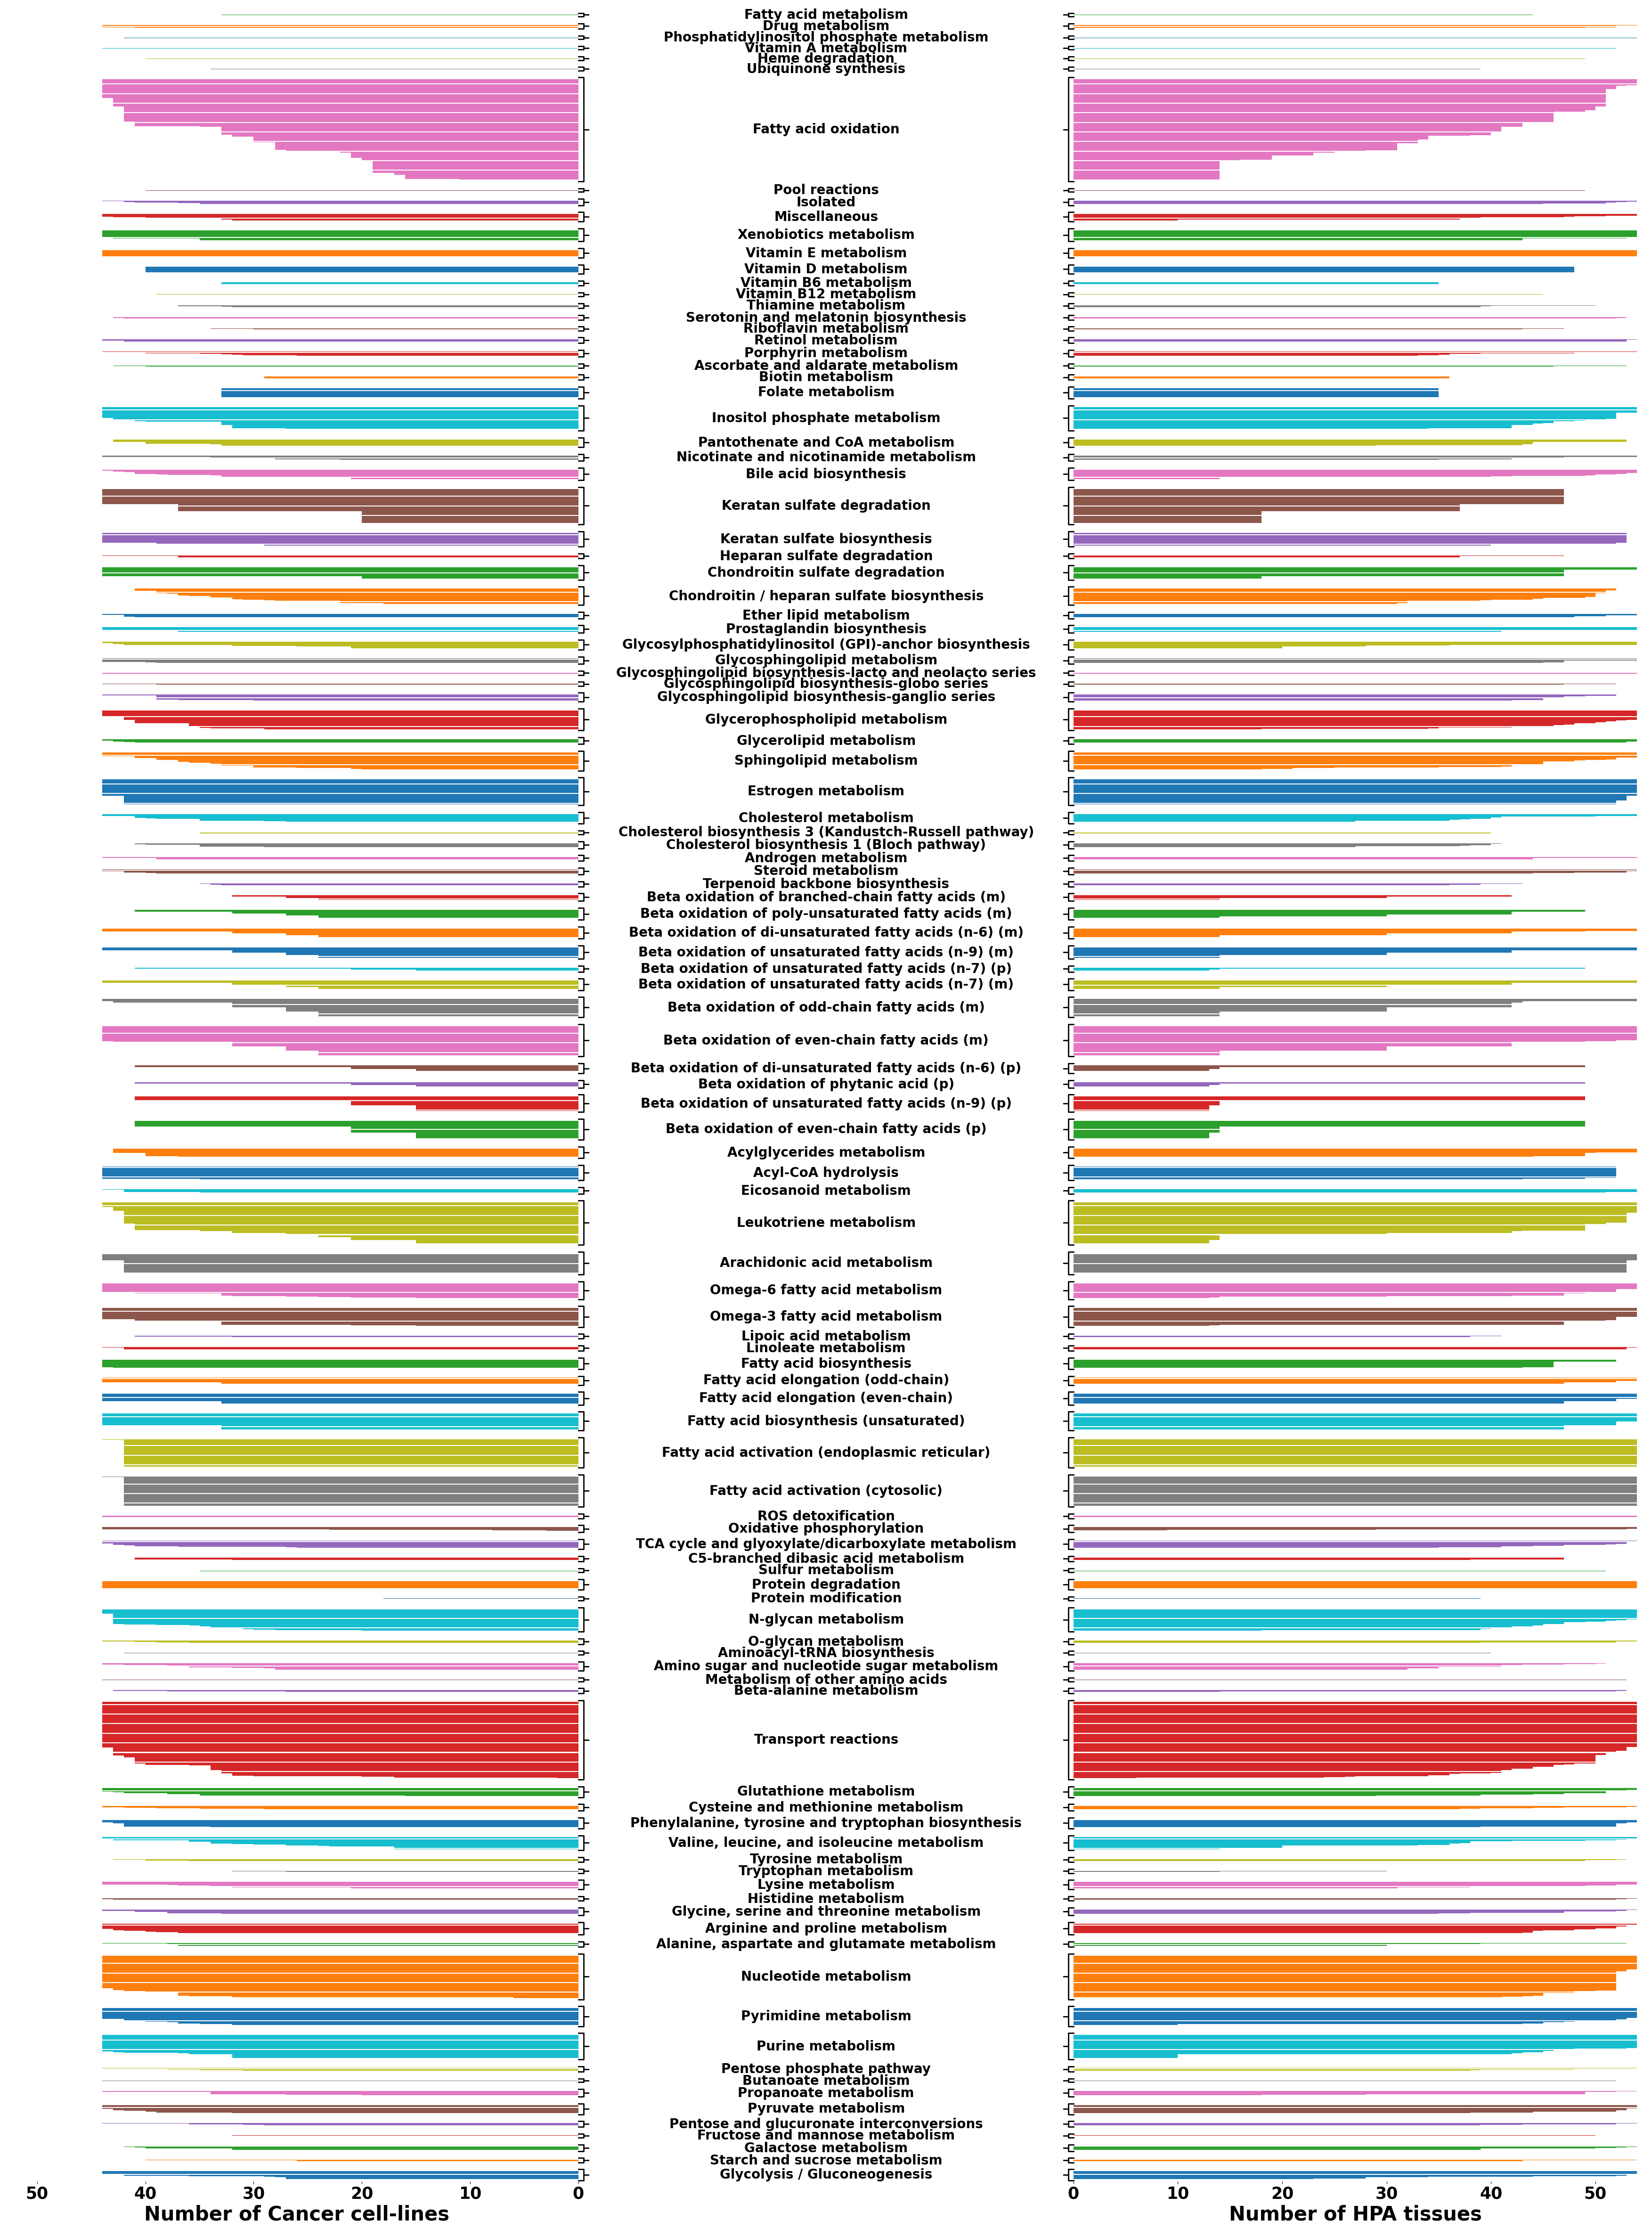

In [109]:
plot_count_data(tissue_ih, cancer_ih, 'Human1')

C:\Users\Admin\AppData\Local\Temp\ipykernel_13588\1786202805.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[2].set_xticklabels(ax[2].get_xticklabels(),fontweight='bold', fontsize=25)
C:\Users\Admin\AppData\Local\Temp\ipykernel_13588\1786202805.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels([int(-1*f) for f in ax[0].get_xticks()],fontweight='bold', fontsize=25)


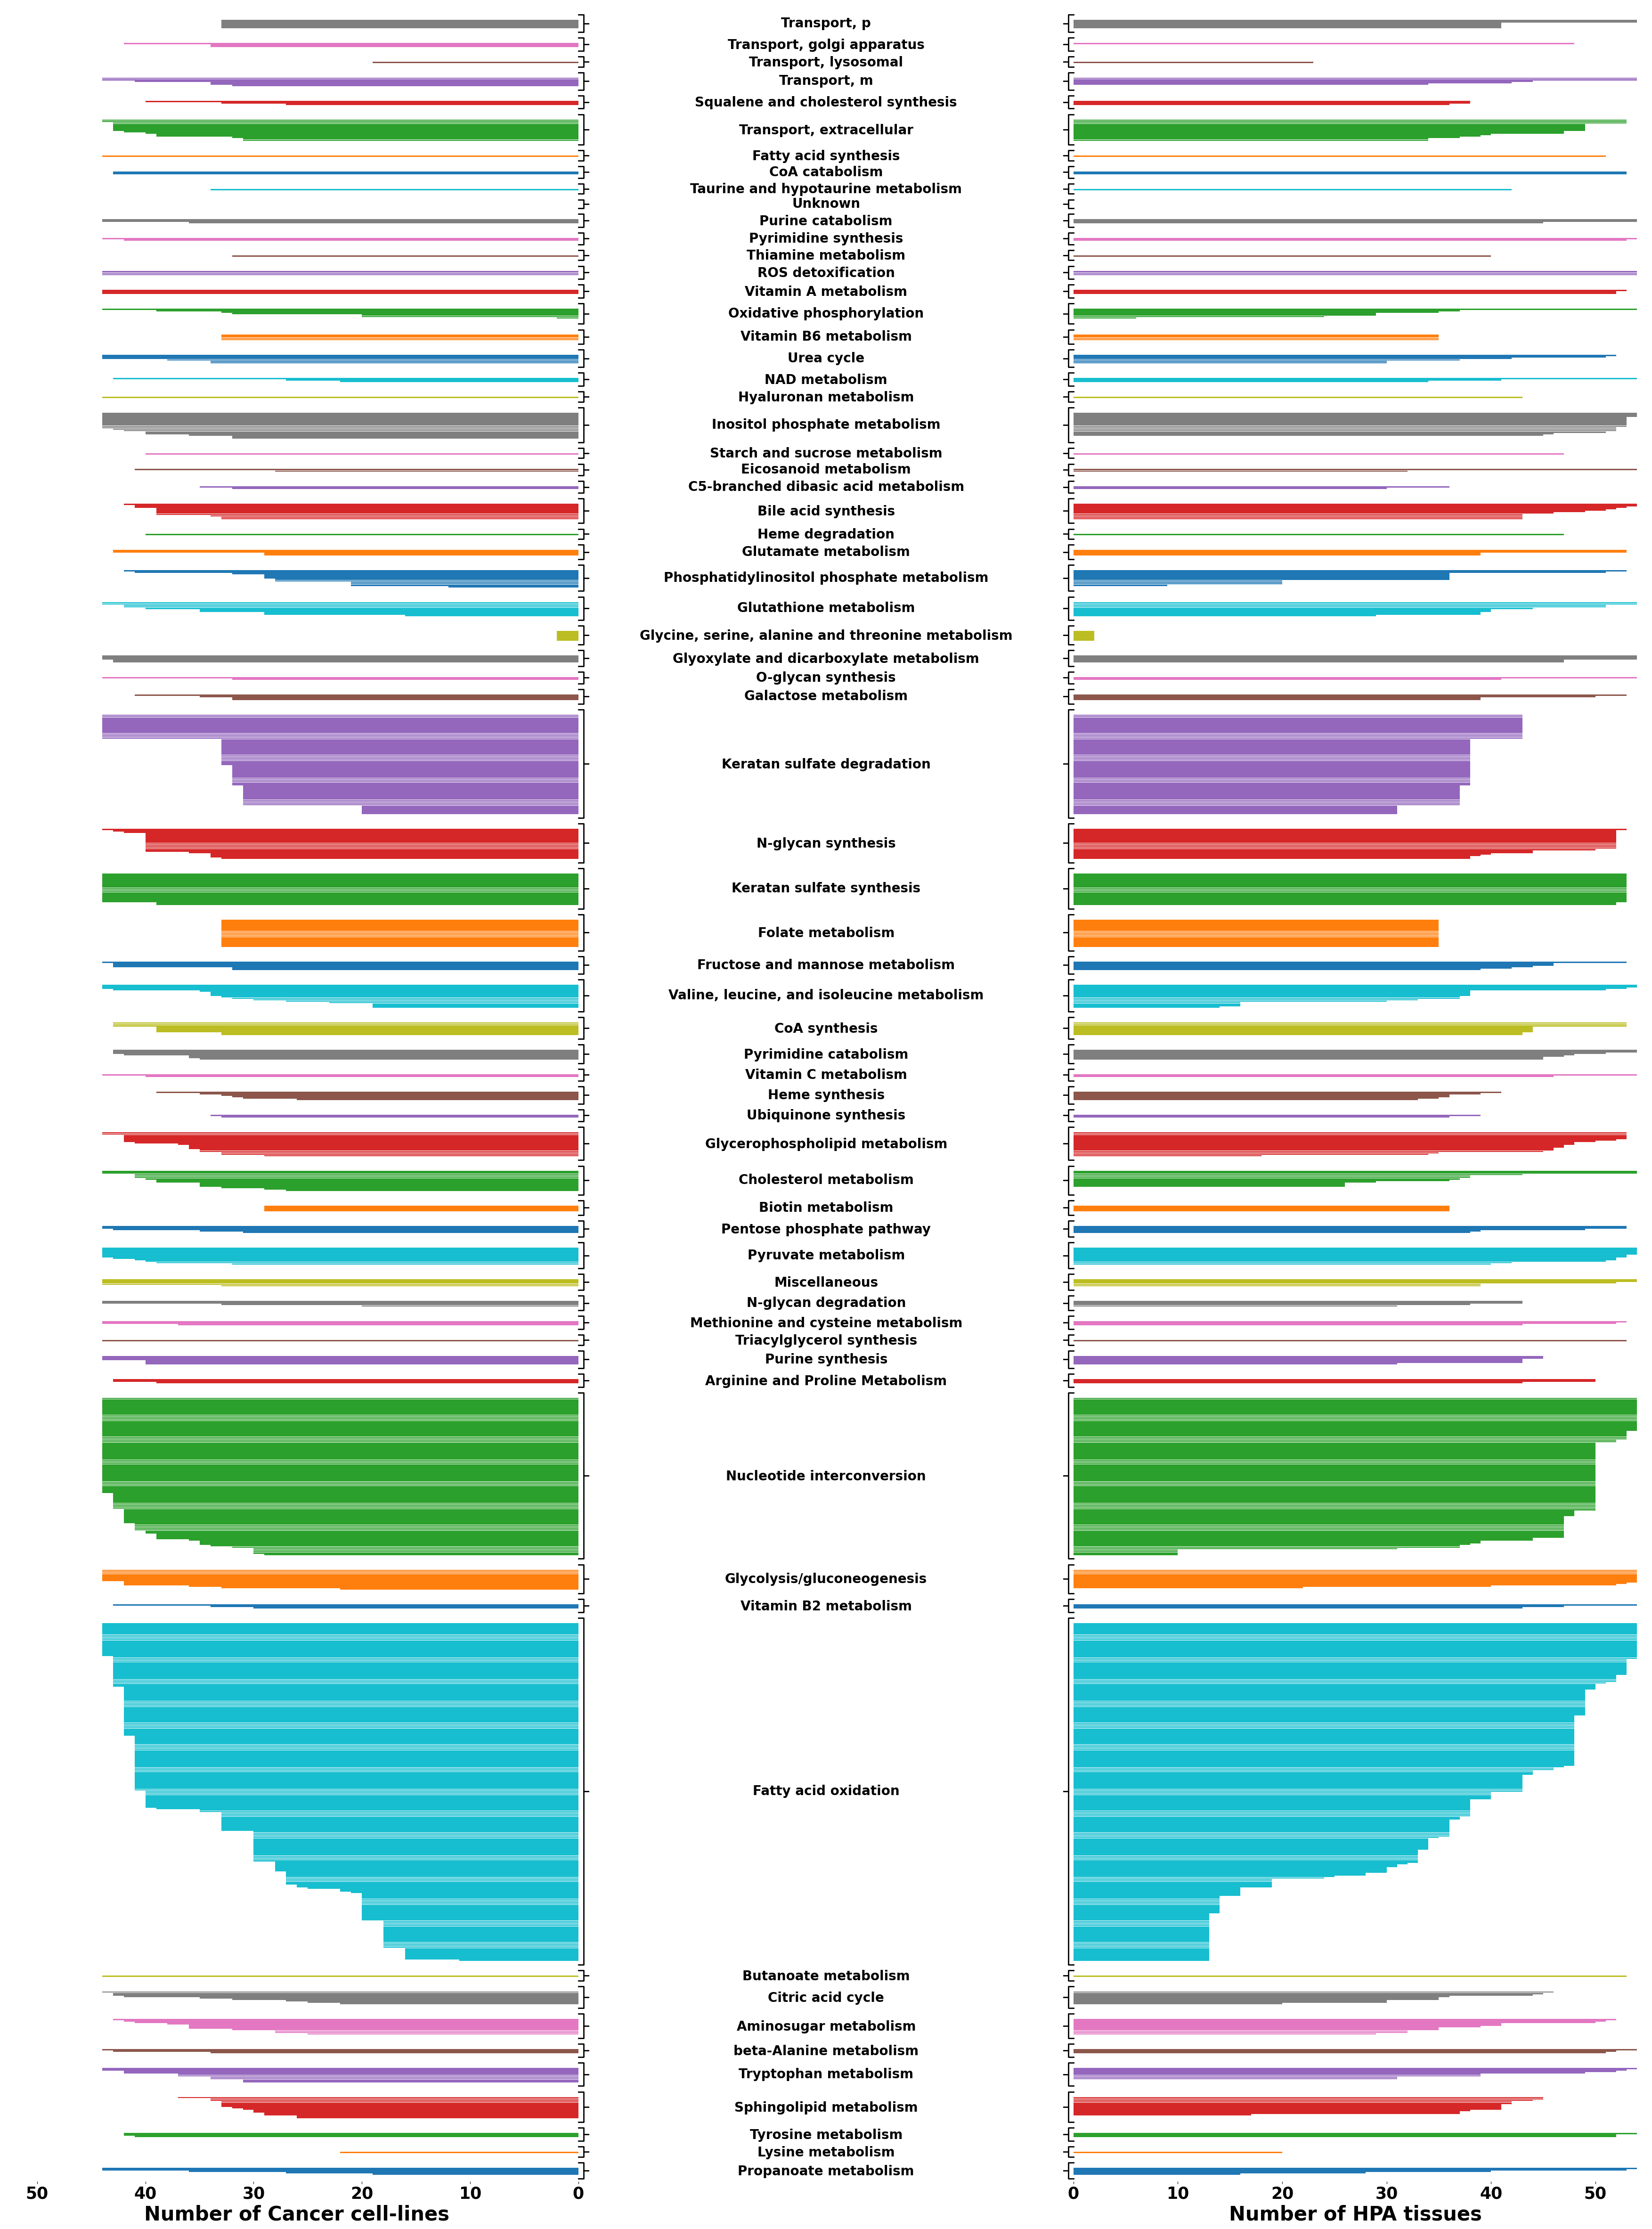

In [110]:
plot_count_data(tissue_r2, cancer_r2, 'Recon2.2')

C:\Users\Admin\AppData\Local\Temp\ipykernel_13588\1786202805.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[2].set_xticklabels(ax[2].get_xticklabels(),fontweight='bold', fontsize=25)
C:\Users\Admin\AppData\Local\Temp\ipykernel_13588\1786202805.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels([int(-1*f) for f in ax[0].get_xticks()],fontweight='bold', fontsize=25)


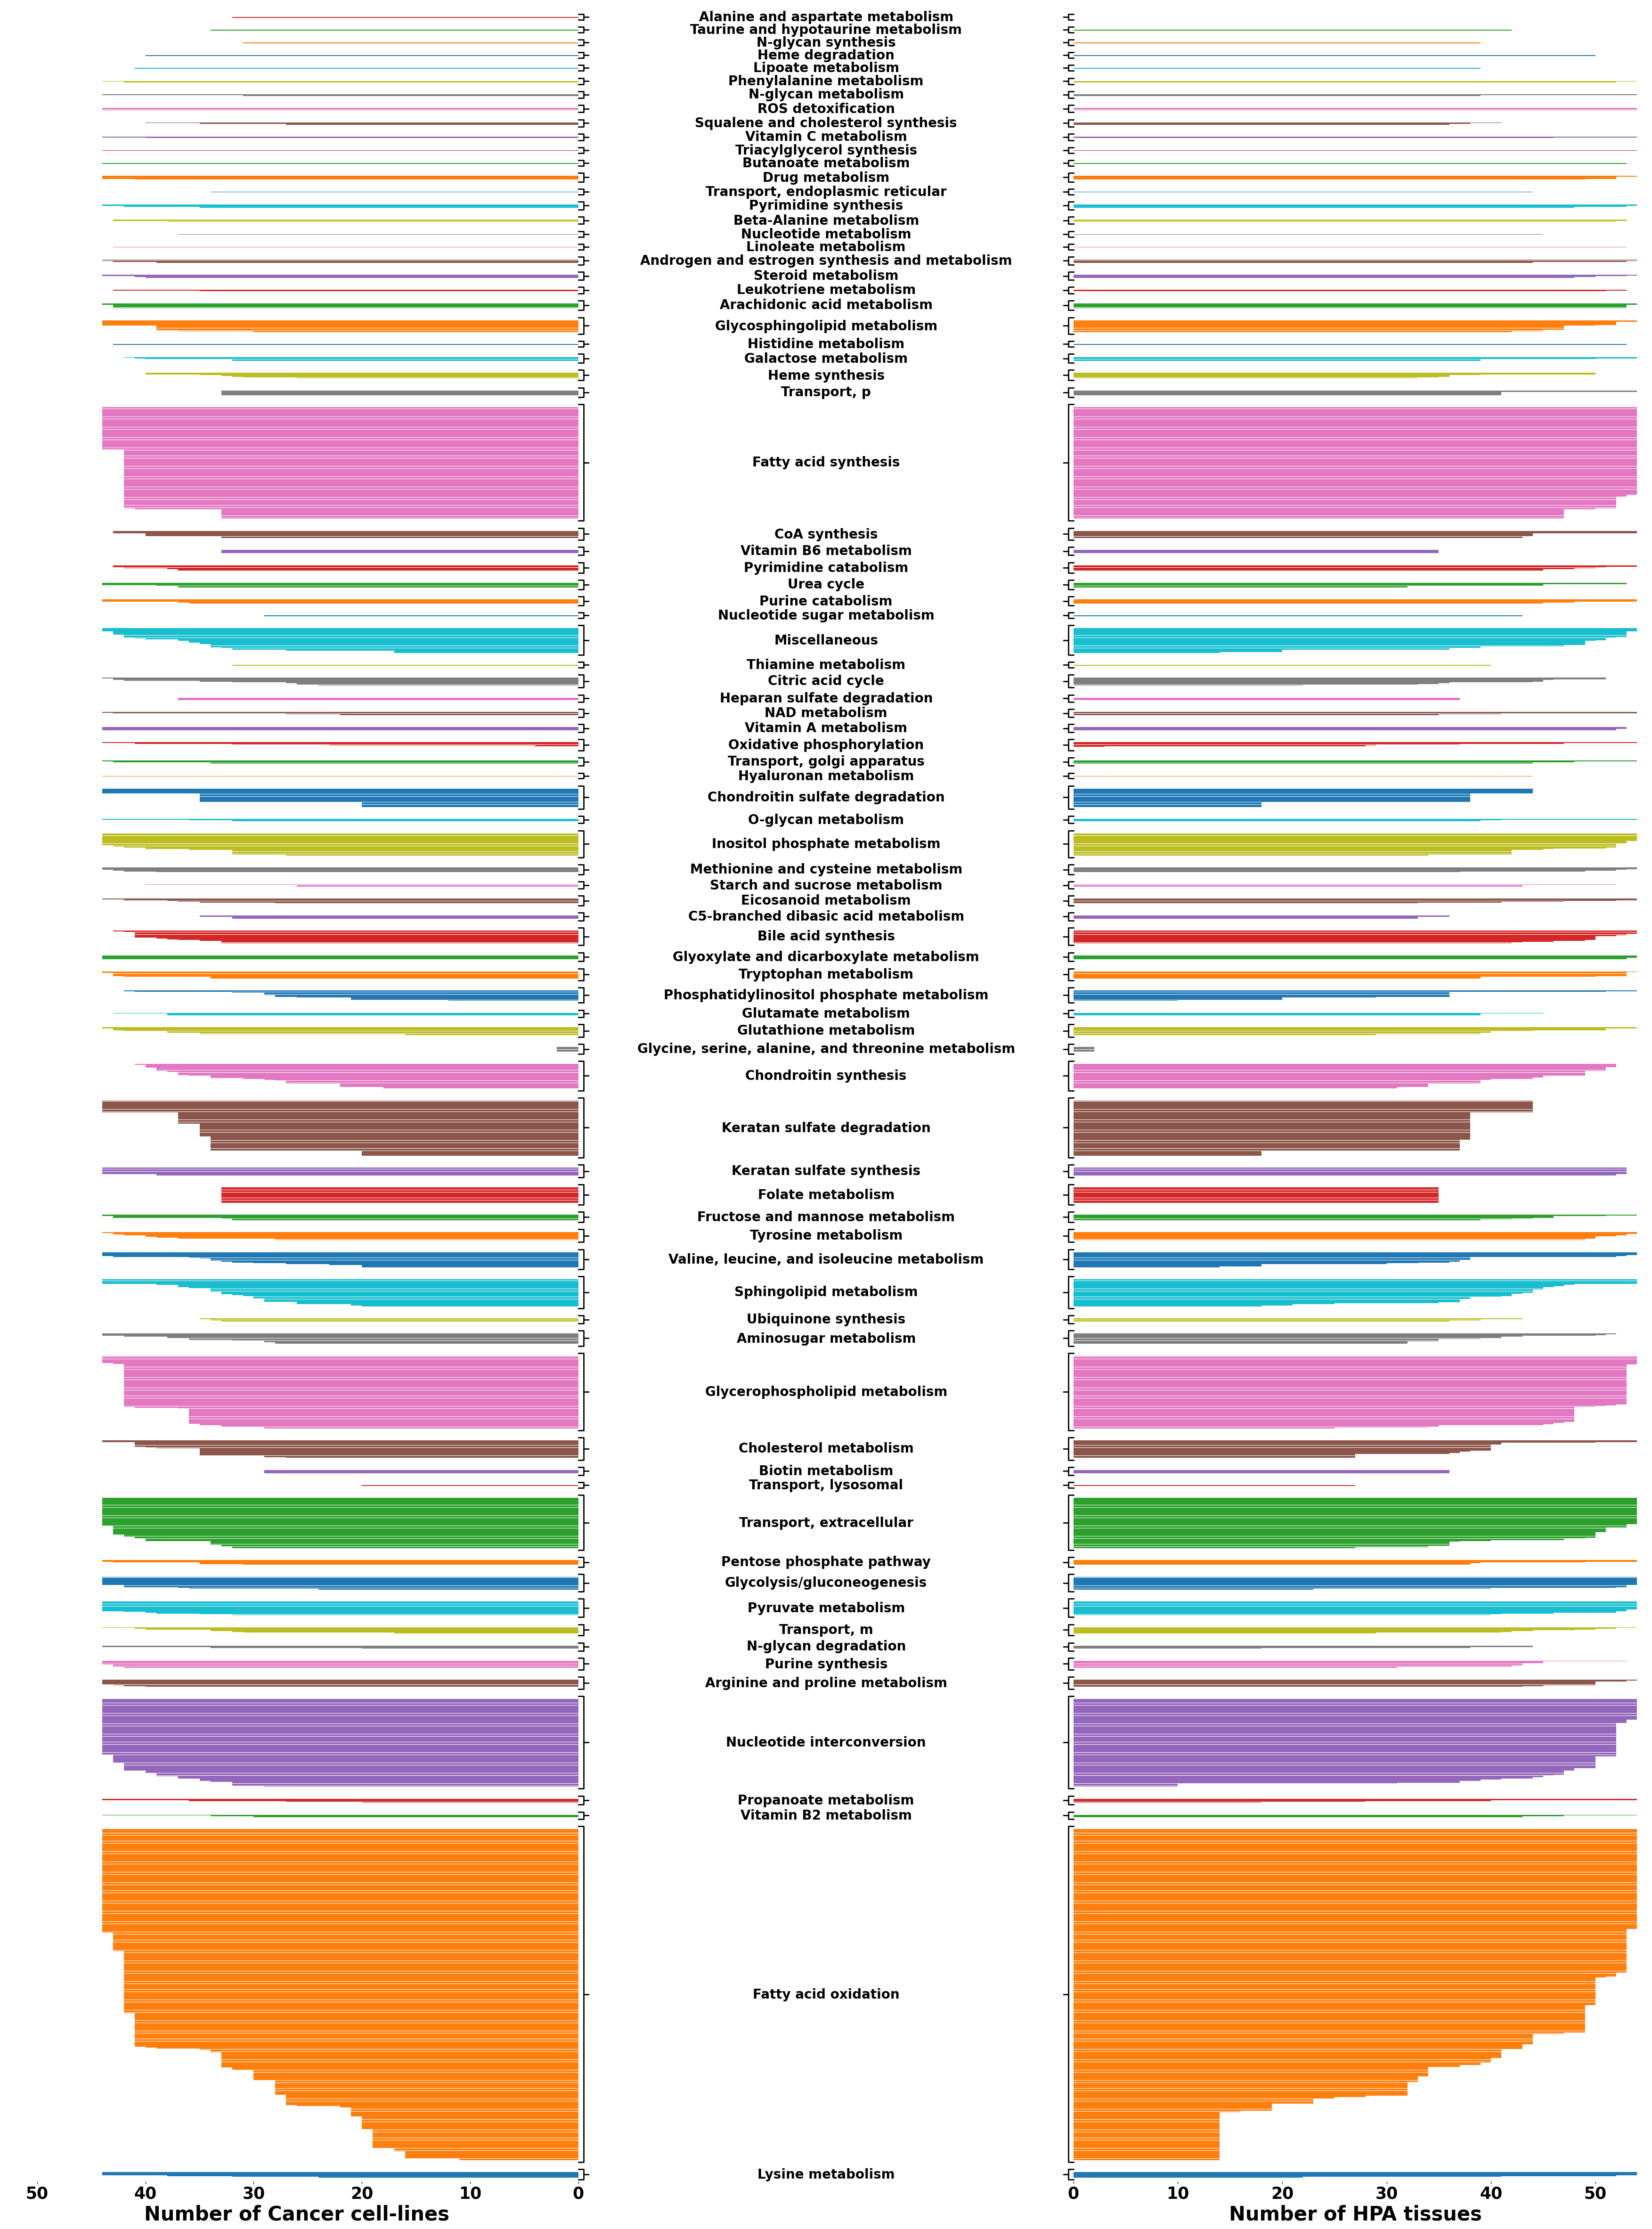

In [111]:
plot_count_data(tissue_r3d, cancer_r3d, 'Recon3D')